In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unidecode
import re

In [2]:
df = pd.read_csv('podcast_sample_new.csv', lineterminator='\n', index_col = 0)
df.head(3)

,podcast_id,title,content,rating,author_id,created_at,itunes_id,slug,itunes_url,podcast_title,category
0,b313ef8ef0d5b64290d3036ff1bbf2d2,감성 라디오 음악도시,미국 서부에 있는 유학생이에요. 성시경씨 제대 후 라디오 복귀만 기다려오다가 6 월...,5,664CCA7142E9AE8,2011-09-14T13:25:46-07:00,442838670,fm-%EC%9D%8C%EC%95%85%EB%8F%84%EC%8B%9C-%EC%A2...,https://podcasts.apple.com/us/podcast/fm-%EC%9...,FM 음악도시(종영),music
1,abfb842993be20d21bfae7103addc5e9,They’ve really cut back on the content this se...,Last season there was a new pod every 3-4 days...,1,AD790CE113DCBC1,2018-04-11T13:46:47-07:00,1015394113,the-good-phight-for-philadelphia-phillies-fans,https://podcasts.apple.com/us/podcast/the-good...,The Good Phight: for Philadelphia Phillies fans,sports
2,ebdf879a424547d01862a9bbba18a0f3,Good info. source...,Bob brings a lot of knowledge to any firearm d...,4,E223A4B2642C970,2010-01-19T08:11:43-07:00,333180229,handgun-world-podcast,https://podcasts.apple.com/us/podcast/handgun-...,Handgun World Podcast,news


In [7]:
total_number_podcast = len(df.podcast_id.unique())
total_number_reviews = len(df.podcast_id)
print('Total Number of Podcasts: ' + str(total_number_podcast))
print('Total Number of Reviews: ' + str(total_number_reviews))

Total Number of Podcasts: 15073
Total Number of Reviews: 50000


In [9]:
# reviews categorized by podcast categories
df['category'].value_counts()

comedy        8019
society       6445
news          5206
business      3783
sports        3589
arts          3181
education     2988
crime         2521
health        2353
tv            2177
religion      2093
leisure       1726
history       1417
kids          1224
music          891
science        820
fiction        776
government     413
technology     378
Name: category, dtype: int64

In [77]:
# percentage of each category
df['category'].value_counts()/len(df)

comedy        0.16038
society       0.12890
news          0.10412
business      0.07566
sports        0.07178
arts          0.06362
education     0.05976
crime         0.05042
health        0.04706
tv            0.04354
religion      0.04186
leisure       0.03452
history       0.02834
kids          0.02448
music         0.01782
science       0.01640
fiction       0.01552
government    0.00826
technology    0.00756
Name: category, dtype: float64

Text(0.5, 1.05, 'Fig. 1: Number of Reviews Per Genre')

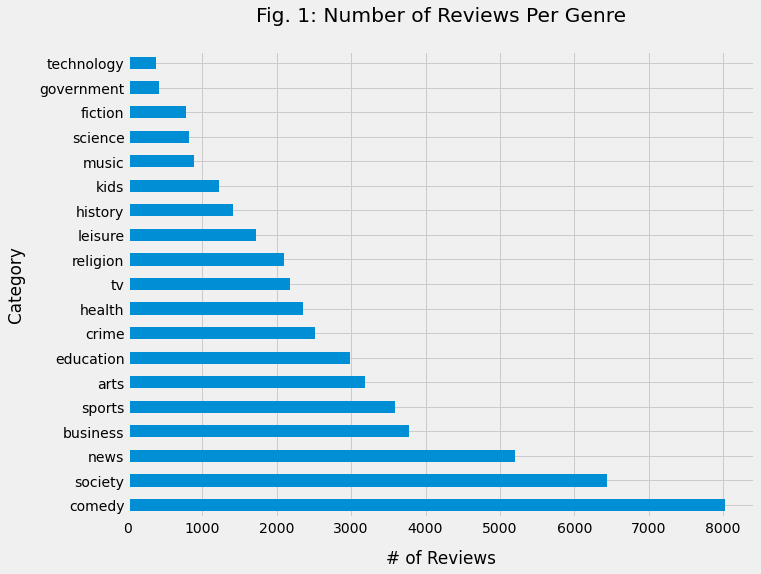

In [12]:
df['category'].value_counts().plot(kind='barh', figsize=(10, 8))
plt.xlabel("# of Reviews", labelpad=14)
plt.ylabel("Category", labelpad=14)
plt.style.use('fivethirtyeight')
plt.title("Fig. 1: Number of Reviews Per Genre", y=1.05)

In [13]:
# average rating of each category
genre = df[['category', 'rating']]
genre.groupby('category').mean()

,rating
category,
arts,3.711097
business,4.068993
comedy,3.388203
crime,2.813169
education,3.975234
fiction,3.364691
government,3.092010
health,3.984275
history,3.199012


Text(0.5, 1.05, 'Fig. 2: Average Rating Per Genre')

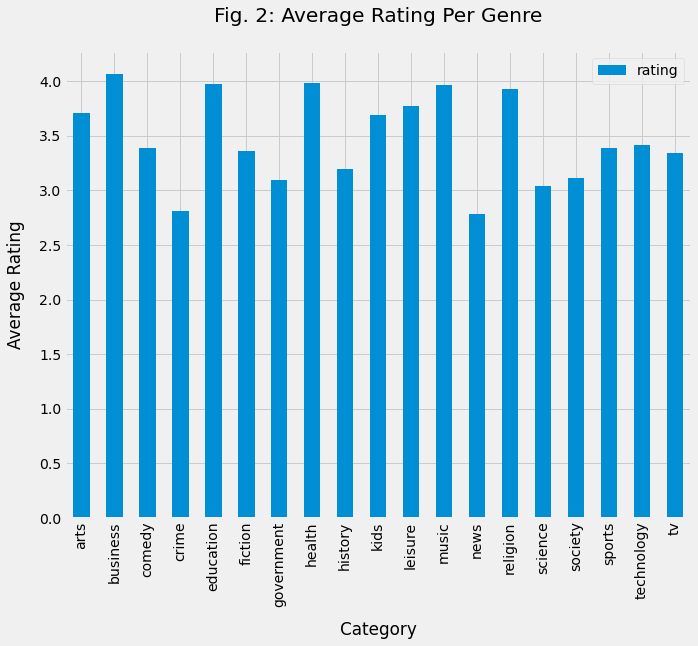

In [17]:
genre.groupby('category').mean().plot(kind='bar', figsize=(10, 8))
plt.xlabel("Category", labelpad=14)
plt.ylabel("Average Rating", labelpad=14)
plt.style.use('fivethirtyeight')
plt.title("Fig. 2: Average Rating Per Genre", y=1.05)

### Positive/Negative Reviews

In [74]:
# The shape of positive/negative reviews
pos = df[df['rating']>=4]
neg = df[df['rating']<4]
print(f'The shape of pos: {pos.shape}, the shape of neg: {neg.shape}')

The shape of pos: (28249, 11), the shape of neg: (21751, 11)


In [75]:
# The percentage of positive/negative reviews
print(len(pos)/len(df))
print(len(neg)/len(df))

0.56498
0.43502


In [76]:
# The shape of whole dataset
df.shape

(50000, 11)

### Merge catgories for better analysis

In [81]:
import re
def replace_cat(line):
    line = re.sub(r'\b(society|religion|government|history|education|kids)\b', 'society', line)
    line = re.sub(r'\b(tv|leisure|sports|music|fiction|arts)\b', 'entertainment', line)
    line = re.sub(r'\b(science|technology|health|crime)\b', 'others', line)
    return line

In [82]:
df['category_new'] = df['category'].apply(lambda x: replace_cat(x))

In [83]:
# The average rating of each category
genre = df[['category_new', 'rating']]
genre.groupby('category_new').mean()

,rating
category_new,
business,4.068993
comedy,3.388203
entertainment,3.556888
news,2.781598
others,3.335310
society,3.464746


In [84]:
# The percentage of each category 
df['category_new'].value_counts()/len(df)

society          0.29160
entertainment    0.24680
comedy           0.16038
others           0.12144
news             0.10412
business         0.07566
Name: category_new, dtype: float64